## 1. Plot Experimental Data

In [1]:
import pandas as pd
import numpy as np
# import csv
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

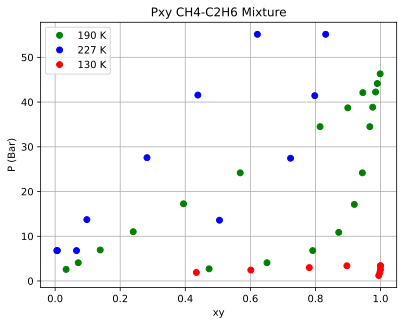

In [2]:
# Experimental Data

## 130.4 K
P_130K_bubble = \
[[0.4341214072950716, 1.9015280135823502],
[0.6013691098369272, 2.444821731748732],
[0.7810723283930177, 2.9881154499151137],
[0.8967216284310819, 3.395585738539907],
[0.9999244754061711, 3.395585738539907]]

P_130K_dew = \
[[0.9946347328544067, 1.222410865874366],
[0.9981783467968506, 1.9015280135823502],
[0.9999426013086901, 2.5806451612903345],
[0.9999244754061711, 3.395585738539907]]

## 190.9 K
P_190K_bubble = \
[[0.03375043049018478, 2.5806451612903345],
[0.0710837477116048, 4.074702886247891],
[0.138635965415778, 6.9269949066214025],
[0.2399688234476674, 11.00169779286928],
[0.39463412865765607, 17.249575551782684],
[0.5688572826855336, 24.176570458404086],
[0.8141792893437818, 34.499151103565374],
[0.8994948915164733, 38.70967741935485],
[0.945682712118374, 42.10526315789475],
[0.998969844540176, 46.31578947368422]]

P_190K_dew = \
[[0.47324918886586226, 2.716468590831923],
[0.6511549220888291, 4.074702886247891],
[0.7916638974315595, 6.7911714770798],
[0.8716444422961893, 10.865874363327677],
[0.919548181669879, 17.113752122241095],
[0.9443021225431849, 24.176570458404086],
[0.9672042003758103, 34.499151103565374],
[0.9760043260487345, 38.84550084889644],
[0.9848255986079304, 42.241086587436335],
[0.9901213831272015, 44.142614601018686]]

## 227.6 K
P_227K_bubble = \
[[0.005187029104157415, 6.7911714770798],
[0.09755964932420591, 13.718166383701202],
[0.28230488976430274, 27.572156196943986],
[0.4385773583309667, 41.56196943972836],
[0.621549281307965, 55.14431239388795]]

P_227K_dew = \
[[0.006966388534762447, 6.7911714770798],
[0.06568524974472684, 6.7911714770798],
[0.5050359799164998, 13.5823429541596],
[0.7235890495380914, 27.436332767402384],
[0.7980109842969263, 41.42614601018677],
[0.831513694119353, 55.14431239388795]]



x_130K_bubble = [point[0] for point in P_130K_bubble]
y_130K_bubble = [point[1] for point in P_130K_bubble]

x_130K_dew = [point[0] for point in P_130K_dew]
y_130K_dew = [point[1] for point in P_130K_dew]


x_190K_bubble = [point[0] for point in P_190K_bubble]
y_190K_bubble = [point[1] for point in P_190K_bubble]

x_190K_dew = [point[0] for point in P_190K_dew]
y_190K_dew = [point[1] for point in P_190K_dew]

x_227K_bubble = [point[0] for point in P_227K_bubble]
y_227K_bubble = [point[1] for point in P_227K_bubble]

x_227K_dew = [point[0] for point in P_227K_dew]
y_227K_dew = [point[1] for point in P_227K_dew]

plt.plot(x_190K_bubble,y_190K_bubble, 'go', label = '190 K')
plt.plot(x_190K_dew,y_190K_dew, 'go')

plt.plot(x_227K_bubble,y_227K_bubble, 'bo', label = '227 K')
plt.plot(x_227K_dew,y_227K_dew, 'bo')

plt.plot(x_130K_bubble,y_130K_bubble, 'ro', label = '130 K')
plt.plot(x_130K_dew,y_130K_dew, 'ro')

plt.xlabel('xy')
plt.ylabel('P (Bar)')
plt.title('Pxy CH4-C2H6 Mixture')
plt.legend()
plt.grid()
plt.show()

In [11]:
'''
Tc in K
Pc in MPa
'''
methane = dict(A = 4.22061, B = 516.689, C = 11.223, Tc = 190.6, Pc = 4.600, omega = 0.008)
ethane  = dict(A = 3.93835, B = 659.739, C = -16.719, Tc = 305.4, Pc = 4.884, omega = 0.098)

R       = 8.314e-3 # L Bar /K /mol

## 2. Code Everything In
### 2.1 Write functions to find parameters and fugacity

In [12]:
def find_A(a,P,R,T):
    '''
    P in Bar
    T in K
    R in L Bar /K /mol
    '''
    A = a*P/(R*T)
    return A

def find_B(b,P,R,T):
    '''
    P in Bar
    T in K
    R in L Bar /K /mol
    '''
    B = b*P/R/T
    return B

def find_alpha(T,Tc,omega):
    '''
    Tc, T in K
    omega is unitless
    '''
    kappa = 0.37464 + 1.5422*omega - 0.26992*omega**2
    alpha = (1 + kappa*(1-np.sqrt(T/Tc)))**2
    return alpha

def find_a(T,Tc,Pc,R,alpha):
    '''
    Pc in Bar
    T, Tc in K
    R in L Bar /K /mol
    '''
    a = 0.45724*R*R*Tc*Tc/Pc*alpha
    return a

def find_b(Tc,Pc,R):
    '''
    Pc in Bar
    Tc in K
    R in L Bar /K /mol
    '''
    b = 0.07780*(R*Tc/Pc)
    return b

def find_a12(a11,a22,k12):
    '''
    a11 and a22 from find_a
    '''
    a12 = np.sqrt(a11*a22)*(1-k12)
    return a12
def find_amix(a11,a22,a12,xy1):
    '''
    van der Waal mixing rule. 
    Last parameter: if mixing vapor, use y; if mixing liquid, use x.
    For example, if mixing vapor, xy1 becomes y1, and xy2 becomes y2.
    
    a11 and a22 from find_a()
    a12 from find_a12()
    '''
    xy2 = 1-xy1
    amix = xy1**2*a11 + 2*xy1*xy2*a12 + xy2**2*a22
    return amix

def find_bmix(b1,b2,xy1):
    '''
    van der Waal mixing rule. 
    Last parameter: if mixing vapor, use y; if mixing liquid, use x.
    For example, if mixing vapor, xy1 becomes y1, and xy2 becomes y2.
    
    b1 and b2 from find_b()
    '''
    xy2 = 1-xy1
    bmix = xy1*b1 + xy2*b2
    return bmix

def find_Z(A,B):
    coeff = [1, -(1-B), (A - 3*B*B - 2*B), -(A*B - B*B - B**3)]
    roots = np.roots(coeff)
    real_roots = roots[np.isreal(roots)].real
    # Zl = min(roots)
    # Zv = max(roots)
    Zl = min(real_roots)
    Zv = max(real_roots)
    return np.array([Zl,Zv])

def find_f(Z,B1,B2,Amix,Bmix,xy1,A11,A12,A22,P):
    '''
    Find fugacity of component 1 AND 2. In other words, just need to take in x1 or y1 and
    it will find fugacity of liquid or vapor, for both components. 
    
    fv: Fugacity of vapor --> f1v
        Z --> Zv_mix 
        xy1 --> y1
    '''
    xy2 = 1-xy1
    sumterm1 = xy1*A11 + xy2*A12
    sumterm2 = xy1*A12 + xy2*A22

    stuff1 = B1/Bmix*(Z-1) - np.log(Z-Bmix) \
            - Amix/(2*np.sqrt(2)*Bmix)*(2*sumterm1/Amix - B1/Bmix)*np.log((Z+(1+np.sqrt(2))*Bmix)/((Z+(1-np.sqrt(2))*Bmix)))
    stuff2 = B2/Bmix*(Z-1) - np.log(Z-Bmix) \
            - Amix/(2*np.sqrt(2)*Bmix)*(2*sumterm2/Amix - B2/Bmix)*np.log((Z+(1+np.sqrt(2))*Bmix)/((Z+(1-np.sqrt(2))*Bmix)))                                                                    
    
    f1    = xy1*P*np.exp(stuff1)
    f2    = xy2*P*np.exp(stuff2)
    return np.array([f1,f2])

def P_antoine(comp,T):
    '''
    T in K
    '''
    T_c = T - 273.15 # convert to C
    A = comp['A']
    B = comp['B']
    C = comp['C']
    Psat = np.exp(A - B/(T_c+C))
    return Psat/1000 

### 2.2 Objective Functions 

In [13]:
def findP_bubble(Py, x1,T,R,comp1,comp2,k12):
    P = Py[0]
    y1 = Py[1]
    x2 = 1 - x1
    y2 = 1 - y1

    Tc1 = comp1['Tc']
    Tc2 = comp2['Tc']
    Pc1 = comp1['Pc']
    Pc2 = comp2['Pc']
    omega1 = comp1['omega']
    omega2 = comp2['omega']

    ## Find alpha1, alpha2
    alpha1 = find_alpha(T,Tc1,omega1)
    alpha2 = find_alpha(T,Tc2,omega2)
    
    ## Find a11,a22,a12
    a11 = find_a(T,Tc1,Pc1,R,alpha1)
    a22 = find_a(T,Tc2,Pc2,R,alpha2)
    a12 = find_a12(a11,a22,k12)

    ## Find b1, b2
    b1 = find_b(Tc1,Pc1,R)
    b2 = find_b(Tc2,Pc2,R)

    ## Find amix and bmix
    amix_l = find_amix(a11,a22,a12,x1)
    bmix_l = find_bmix(b1,b2,x1)

    ## Find Amix and Bmix
    Amix_l = find_A(amix_l,P,R,T)
    Bmix_l = find_B(bmix_l,P,R,T)

    A11    = find_A(a11,P,R,T)
    A12    = find_A(a12,P,R,T)
    A22    = find_A(a22,P,R,T)
    B1     = find_B(b1,P,R,T)
    B2     = find_B(b2,P,R,T)

    ## Find Z_l
    Zl_mix = find_Z(Amix_l,Bmix_l)[0]

    ## Find f1_l and f2_l
    f1_l = find_f(Zl_mix,B1,B2,Amix_l,Bmix_l,x1,A11,A12,A22,P)[0]
    f2_l = find_f(Zl_mix,B1,B2,Amix_l,Bmix_l,x1,A11,A12,A22,P)[1]

    #################################################
    ## Find amix and bmix for vapor phase
    amix_v = find_amix(a11,a22,a12,y1)
    bmix_v = find_bmix(b1,b2,y1)

    ## Find Amix and Bmix
    Amix_v = find_A(amix_v,P,R,T)
    Bmix_v = find_B(bmix_v,P,R,T)

    ## Find Z_v
    Zv_mix = find_Z(Amix_v,Bmix_v)[1]

    ## Find f1_v and f2_v 
    f1_v = find_f(Zv_mix,B1,B2,Amix_v,Bmix_v,y1,A11,A12,A22,P)[0]
    f2_v = find_f(Zv_mix,B1,B2,Amix_v,Bmix_v,y1,A11,A12,A22,P)[1]

    eqn1 = f1_l - f1_v
    eqn2 = f2_l - f2_v

    return np.array([eqn1, eqn2])


# Test
T  = 190.9 #130.4 #190.9 # K
k12 = 0.049
x1_arr = np.linspace(0.01, 0.99, 100)

P_bubble = []

comp1 = methane
comp2 = ethane
Pvap1  = P_antoine(comp1,T)
Pvap2  = P_antoine(comp2,T)


for x1 in x1_arr:
    x2 = 1-x1
    PB_guess = x1*Pvap1 + x2*Pvap2 
    y_guess  = 0.5*x1
    Py_guess = [PB_guess, y_guess]
    results = fsolve(findP_bubble, Py_guess, args=(x1,T,R,comp1,comp2,k12))
    P_bubble.append(results[0])

In [14]:
def findP_dew(Px, y1,T,R,comp1,comp2,k12):
    P = Px[0]
    x1 = Px[1]
    x2 = 1 - x1
    y2 = 1 - y1

    Tc1 = comp1['Tc']
    Tc2 = comp2['Tc']
    Pc1 = comp1['Pc']
    Pc2 = comp2['Pc']
    omega1 = comp1['omega']
    omega2 = comp2['omega']

    ## Find alpha1, alpha2
    alpha1 = find_alpha(T,Tc1,omega1)
    alpha2 = find_alpha(T,Tc2,omega2)
    
    ## Find a11,a22,a12
    a11 = find_a(T,Tc1,Pc1,R,alpha1)
    a22 = find_a(T,Tc2,Pc2,R,alpha2)
    a12 = find_a12(a11,a22,k12)

    ## Find b1, b2
    b1 = find_b(Tc1,Pc1,R)
    b2 = find_b(Tc2,Pc2,R)

    ## Find amix and bmix
    amix_l = find_amix(a11,a22,a12,x1)
    bmix_l = find_bmix(b1,b2,x1)

    ## Find Amix and Bmix
    Amix_l = find_A(amix_l,P,R,T)
    Bmix_l = find_B(bmix_l,P,R,T)

    A11    = find_A(a11,P,R,T)
    A12    = find_A(a12,P,R,T)
    A22    = find_A(a22,P,R,T)
    B1     = find_B(b1,P,R,T)
    B2     = find_B(b2,P,R,T)

    ## Find Z_l
    Zl_mix = find_Z(Amix_l,Bmix_l)[0]

    ## Find f1_l and f2_l
    f1_l = find_f(Zl_mix,B1,B2,Amix_l,Bmix_l,x1,A11,A12,A22,P)[0]
    f2_l = find_f(Zl_mix,B1,B2,Amix_l,Bmix_l,x1,A11,A12,A22,P)[1]

    #################################################
    ## Find amix and bmix for vapor phase
    amix_v = find_amix(a11,a22,a12,y1)
    bmix_v = find_bmix(b1,b2,y1)

    ## Find Amix and Bmix
    Amix_v = find_A(amix_v,P,R,T)
    Bmix_v = find_B(bmix_v,P,R,T)

    ## Find Z_v
    Zv_mix = find_Z(Amix_v,Bmix_v)[1]

    ## Find f1_v and f2_v 
    f1_v = find_f(Zv_mix,B1,B2,Amix_v,Bmix_v,y1,A11,A12,A22,P)[0]
    f2_v = find_f(Zv_mix,B1,B2,Amix_v,Bmix_v,y1,A11,A12,A22,P)[1]

    eqn1 = f1_l - f1_v
    eqn2 = f2_l - f2_v

    return np.array([eqn1, eqn2])


# Test
T  = 190.9 #130.4 #190.9 # K
k12 = 0.049
y1_arr = np.linspace(0.01, 0.99, 100)

P_dew = []

comp1 = methane
comp2 = ethane
Pvap1  = P_antoine(comp1,T)
Pvap2  = P_antoine(comp2,T)

for y1 in y1_arr:
    y2 = 1-y1
    PD_guess = 1/(y1/Pvap1 + y2/Pvap2) 
    x_guess  = 0.5*y1
    Px_guess = [PD_guess, x_guess]
    results = fsolve(findP_dew, Px_guess, args=(y1,T,R,comp1,comp2,k12))
    P_dew.append(results[0])

### At T = 190.9 K

In [16]:
plt.plot(x1_arr,P_bubble,'b', label='PR EoS')
plt.plot(y1_arr,P_dew, 'b')
plt.plot(x_190K_bubble,y_190K_bubble, 'go', label = 'Exp')
plt.plot(x_190K_dew,y_190K_dew, 'go')

plt.xlabel('xy')
plt.ylabel('P (Bar)')
plt.title('Pxy CH4-C2H6 Mixture at 190.9 K')
plt.legend()
plt.grid()
# plt.show()

### At T = 130.4 K (Not converge)

In [17]:
# Test
T  = 130.4 
k12 = 0.049
x1_arr = np.linspace(0.01, 0.99, 100)

P_bubble = []

comp1 = methane
comp2 = ethane
Pvap1  = P_antoine(comp1,T)
Pvap2  = P_antoine(comp2,T)

Py_guess = [PB_guess, y_guess]
for x1 in x1_arr:
    x2 = 1-x1
    PB_guess = x1*Pvap1 + x2*Pvap2 
    y_guess  = 0.5*x1
    Py_guess = [PB_guess, y_guess]
    results = fsolve(findP_bubble, Py_guess, args=(x1,T,R,comp1,comp2,k12))
    P_bubble.append(results[0])

P_dew = []

for y1 in y1_arr:
    y2 = 1-y1
    PD_guess = 1/(y1/Pvap1 + y2/Pvap2) 
    x_guess  = 0.5*y1
    Px_guess = [PD_guess, x_guess]
    results = fsolve(findP_dew, Px_guess, args=(y1,T,R,comp1,comp2,k12))
    P_dew.append(results[0])

plt.plot(x1_arr,P_bubble,'b', label='PR EoS')
plt.plot(y1_arr,P_dew, 'b')
plt.plot(x_190K_bubble,y_190K_bubble, 'go', label = 'Exp')
plt.plot(x_190K_dew,y_190K_dew, 'go')

plt.xlabel('xy')
plt.ylabel('P (Bar)')
plt.title('Pxy CH4-C2H6 Mixture at 130.4 K')
plt.legend()
plt.grid()
plt.show()

/var/folders/x2/7_89wkws12d5tn83_x0dc2580000gn/T/ipykernel_20822/820233970.py:100: RuntimeWarning: invalid value encountered in log
  stuff1 = B1/Bmix*(Z-1) - np.log(Z-Bmix) \
/var/folders/x2/7_89wkws12d5tn83_x0dc2580000gn/T/ipykernel_20822/820233970.py:102: RuntimeWarning: invalid value encountered in log
  stuff2 = B2/Bmix*(Z-1) - np.log(Z-Bmix) \


LinAlgError: Array must not contain infs or NaNs